In [2]:
#essential imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
# Load your dataset
df = pd.read_csv('Database.csv')

           Feature  Importance
8    PV_production    0.303197
1  Day_of_the_week    0.194254
7      Temperature    0.109002
3              DNI    0.105458
4              GHI    0.097303
6         Humidity    0.063245
5       Wind_speed    0.054716
9  Wind_production    0.049187
2              DHI    0.017432
0           Season    0.006207


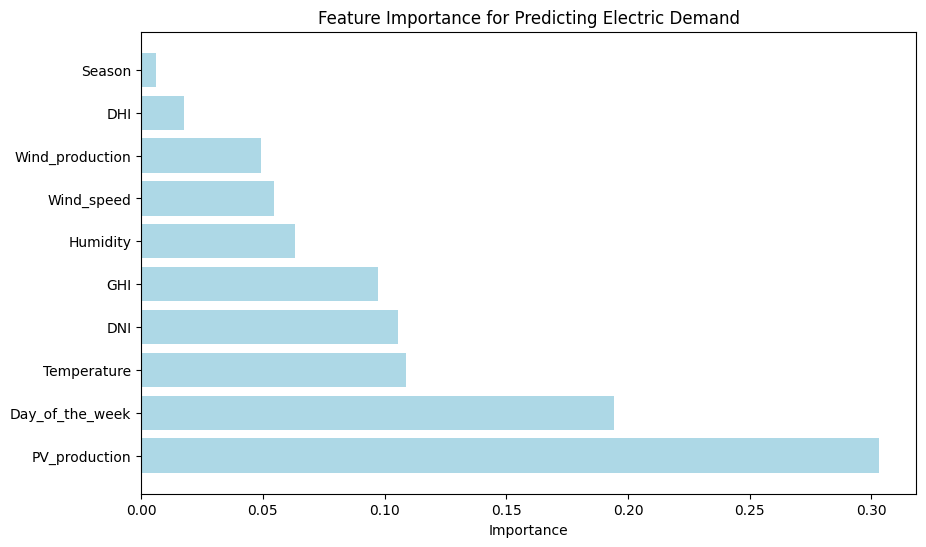

In [4]:
# Handle categorical columns by encoding them
# Example: Encoding 'Season' and 'Day_of_the_week' as they are categorical
label_encoder = LabelEncoder()
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Day_of_the_week'] = label_encoder.fit_transform(df['Day_of_the_week'])

# Select features (X) and target (y)
X = df[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature', 'PV_production', 'Wind_production']]
y = df['Electric_demand']  # Assuming 'Electric_demand' is your target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importances
importances = rf.feature_importances_

# Create a DataFrame to view the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Electric Demand')
plt.show()